<a href="https://colab.research.google.com/github/romanozamoth/image-dim-reduction-dio/blob/main/img_dim_reduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pokes.jpeg to pokes (1).jpeg
Saving gengar2.jpeg to gengar2 (1).jpeg
Saving gengar.jpeg to gengar (1).jpeg


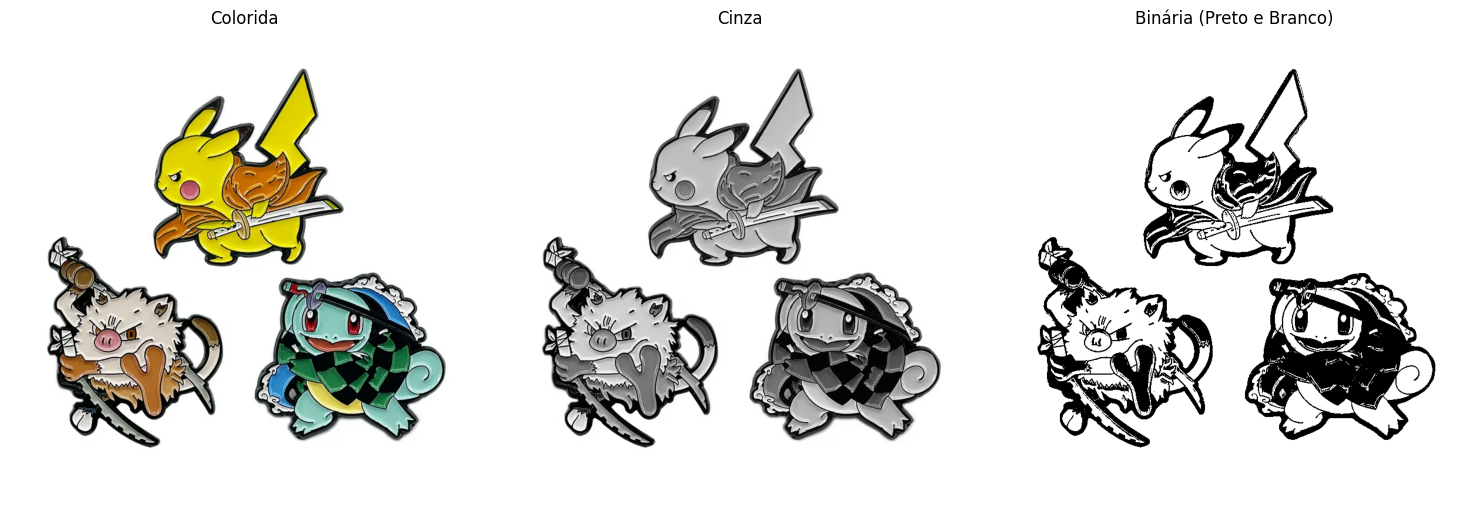

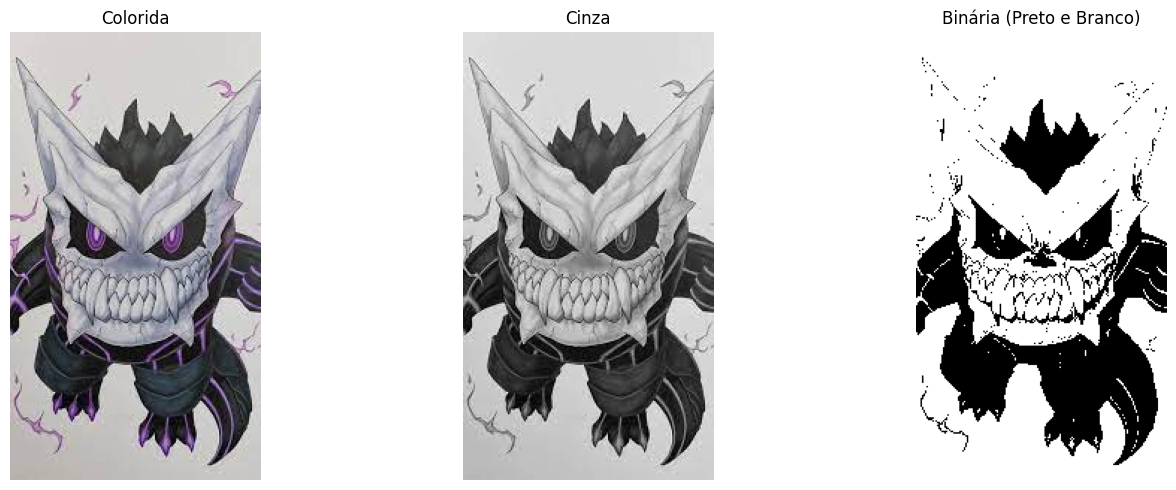

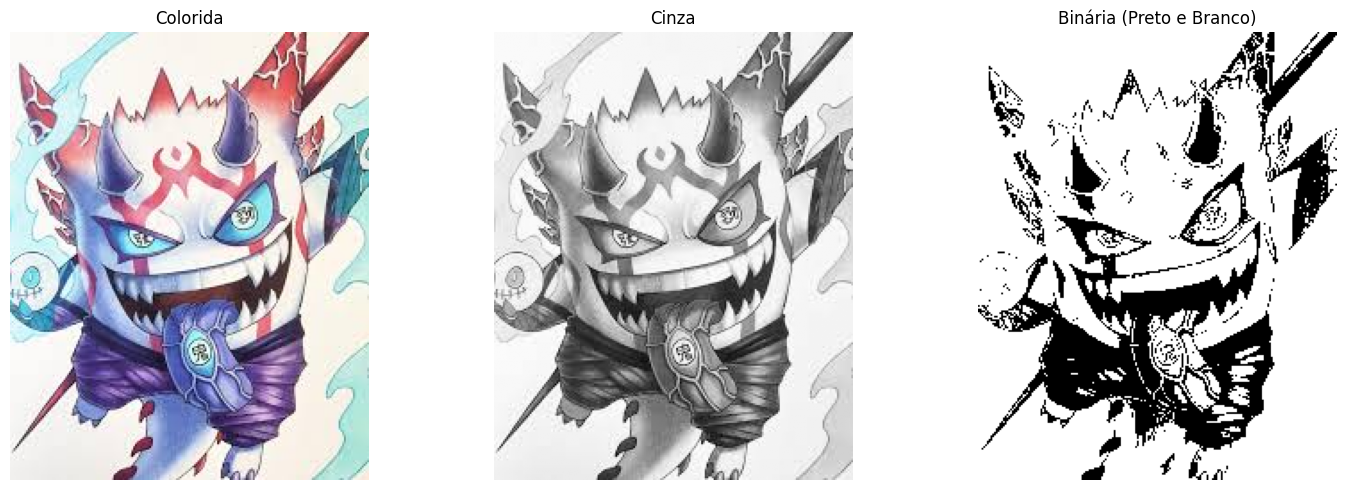

In [2]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Upload de imagem
uploaded = files.upload()

# Lê a primeira imagem enviada
for fn in uploaded.keys():
    img_colorida = Image.open(fn).convert("RGB")  # Garante que é RGB

    # Converte para escala de cinza (0-255)
    img_cinza = img_colorida.convert("L")

    # Converte para imagem binária (0 ou 255)
    # Aplicando limiar (threshold)
    limiar = 128
    img_binaria = img_cinza.point(lambda x: 255 if x > limiar else 0, mode='1')

    # Plotando as 3 imagens
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem colorida
    axs[0].imshow(img_colorida)
    axs[0].set_title("Colorida")
    axs[0].axis("off")

    # Imagem em tons de cinza
    axs[1].imshow(img_cinza, cmap='gray')
    axs[1].set_title("Cinza")
    axs[1].axis("off")

    # Imagem binária (preto e branco)
    axs[2].imshow(img_binaria, cmap='gray')
    axs[2].set_title("Binária (Preto e Branco)")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()
